In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
py.offline.init_notebook_mode(connected=True)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

# Importing dataset and drop bull values


In [2]:
df_census = pd.read_csv('census-income-training.csv')

In [3]:
# droping the bull values from both the columns
df_census.drop(columns='MIGMTR3',inplace=True)
df_census.drop(columns='MIGMTR1',inplace=True)
df_census.drop(columns='MIGSAME',inplace=True)
df_census.drop(columns='PEFNTVTY',inplace=True)
df_census.drop(columns='PEMNTVTY',inplace=True)
df_census.drop(columns='PENATVTY',inplace=True)
df_census.drop(columns='GRINREG',inplace=True)

In [4]:
# # droping the bull values from both the columns
# df_census.drop(df_census[df_census['MIGMTR3'] == '?'].index,inplace=True)
# df_census.drop(df_census[df_census['MIGMTR1'] == '?'].index,inplace=True)
# df_census.drop(df_census[df_census['MIGSAME'] == '?'].index,inplace=True)
# df_census.drop(df_census[df_census['PEFNTVTY'] == '?'].index,inplace=True)
# df_census.drop(df_census[df_census['PEMNTVTY'] == '?'].index,inplace=True)
# df_census.drop(df_census[df_census['PENATVTY'] == '?'].index,inplace=True)
# df_census.drop(df_census[df_census['GRINREG'] == '?'].index,inplace=True)

# Data Preprocessing & Feature Engineering

In [5]:
# There are different kinds of strings in some columns such as education level, we have to encode such data into value.
# Expand all the categories among every columns to be independent columns, it is a kind of one-hot encoding strategy.
df_census = pd.get_dummies(df_census,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
train_col_sacle = df_census[['AAGE','ADTIND','ADTOCC','AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','WKSWORK','HHDREL','NOEMP','SEOTR','VETYN']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df_census['AAGE']= train_scaler_col['AAGE']
df_census['ADTIND']= train_scaler_col['ADTIND']
df_census['ADTOCC']= train_scaler_col['ADTOCC']
df_census['AHRSPAY']= train_scaler_col['AHRSPAY']
df_census['CAPGAIN']= train_scaler_col['CAPGAIN']
df_census['CAPLOSS']= train_scaler_col['CAPLOSS']
df_census['DIVVAL']= train_scaler_col['DIVVAL']
df_census['WKSWORK']= train_scaler_col['WKSWORK']
df_census['HHDREL']= train_scaler_col['HHDREL']
df_census['NOEMP']= train_scaler_col['NOEMP']
df_census['SEOTR']= train_scaler_col['SEOTR']
df_census['VETYN']= train_scaler_col['VETYN']

# Model Building And Saving

In [6]:
# Drop the income and year data from our training dataset
df_X = df_census.drop(['Id'],axis=1)
df_X = df_X.drop(['year'],axis=1)

# Drop the NaN entries from our dataset
df_X.dropna(inplace=True)

# Select the 'income_morethan_50K' to be the 'y' column which is our target
y = df_X['income_morethan_50K']

# Don't use the 'income_morethan_50K column to train the model
df_X = df_X.drop(['income_morethan_50K'],axis=1)

id = df_census['Id']
X_train, X_test, y_train, y_test  = train_test_split(df_X,y, test_size=0.30, random_state=11)

In [7]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
rf=RandomForestClassifier()
dt=DecisionTreeClassifier() # Deciesion Tree
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 
print("Model is created")

Model is created


In [13]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)


Model is trained


In [14]:
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

[22:57:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model is trained


In [16]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.9343226270949162


KeyboardInterrupt: 

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.6273421878113903
0.5670421074250972
0.6359035717964173
0.5803017319924647
0.6311245792518041
0.5066455817706559
0.6126654424872336
0.6316243272447369


In [11]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

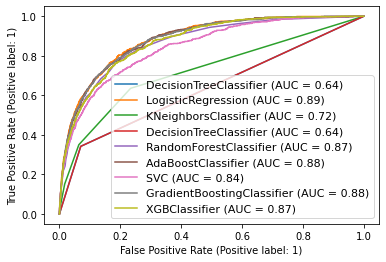

In [12]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)# here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

In [13]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predict the Result on the Testing Dataset(Random Forest)

In [17]:
df_predict=pd.read_csv('census-income-test.csv')

In [18]:
# droping the bull values from both the columns
df_predict.drop(columns='MIGMTR3',inplace=True)
df_predict.drop(columns='MIGMTR1',inplace=True)
df_predict.drop(columns='MIGSAME',inplace=True)
df_predict.drop(columns='PEFNTVTY',inplace=True)
df_predict.drop(columns='PEMNTVTY',inplace=True)
df_predict.drop(columns='PENATVTY',inplace=True)
df_predict.drop(columns='GRINREG',inplace=True)

In [19]:
# There are different kinds of strings in some columns such as education level, we have to encode such data into value.
# Expand all the categories among every columns to be independent columns, it is a kind of one-hot encoding strategy.
df_predict = pd.get_dummies(df_predict,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
train_col_sacle = df_predict[['AAGE','ADTIND','ADTOCC','AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','WKSWORK','HHDREL','NOEMP','SEOTR','VETYN']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df_predict['AAGE']= train_scaler_col['AAGE']
df_predict['ADTIND']= train_scaler_col['ADTIND']
df_predict['ADTOCC']= train_scaler_col['ADTOCC']
df_predict['AHRSPAY']= train_scaler_col['AHRSPAY']
df_predict['CAPGAIN']= train_scaler_col['CAPGAIN']
df_predict['CAPLOSS']= train_scaler_col['CAPLOSS']
df_predict['DIVVAL']= train_scaler_col['DIVVAL']
df_predict['WKSWORK']= train_scaler_col['WKSWORK']
df_predict['HHDREL']= train_scaler_col['HHDREL']
df_predict['NOEMP']= train_scaler_col['NOEMP']
df_predict['SEOTR']= train_scaler_col['SEOTR']
df_predict['VETYN']= train_scaler_col['VETYN']

In [20]:
# Drop the income and year data from our training dataset
pred_X = df_predict.drop(['Id'],axis=1)
pred_X = pred_X.drop(['year'],axis=1)

In [22]:
## Use random forest to predict
pred_rf = rf.predict(pred_X)

In [30]:
Id = np.array(df_predict['Id'])
pred_sub = pd.DataFrame({'Id':Id,'income_morethan_50K':pred_rf})
pred_sub.to_csv('submission.csv')

71739

In [38]:
# rf.get_params()

# Random Forest Parameter Tuning

In [35]:
# Create the param grid for Random forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 300, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [None,2,4]
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
param_grid

{'n_estimators': [30,
  44,
  58,
  72,
  86,
  101,
  115,
  129,
  143,
  157,
  172,
  186,
  200,
  214,
  228,
  243,
  257,
  271,
  285,
  300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False]}

In [36]:
from sklearn.model_selection import GridSearchCV

rf_Grid = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = param_grid, cv = 3, verbose=1, n_jobs = 12)

In [37]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


In [12]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [14]:
rf_tunned=RandomForestClassifier(bootstrap=True,max_depth=2,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=20) # Random Forest

In [15]:
rf_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=20)

In [25]:
print("rf_tunned classification score",rf_tunned.score(X_train,y_train))

rf_tunned classification score 0.9197018008712444


In [26]:
print(roc_auc_score(y_test,rf_tunned.predict(X_test)))

0.5
